## Perceptron to Multilayer Perceptrons

### Single Perceptrons and Basic Logic

In [11]:
import numpy as np
# local library that warehouses perceptrons
from perceptron_operators import *

### Manual implementation of the perceptrons interior logic as example

In [3]:
# the AND perceptron
weight1 = 1.0
weight2 = 1.0
bias = -1.5

and_perceptron(weight1, weight2, bias)

Input 1    Input 2    Linear Combination    Output
0        0          0                  -1.5         0
1        0          1                  -0.5         0
2        1          0                  -0.5         0
3        1          1                   0.5         1
AND Perceptron Weighted well


In [4]:
# the OR perceptron
weight1 = 2.0
weight2 = 2.0
bias = -1.5

or_perceptron(weight1, weight2, bias)

Input 1    Input 2    Linear Combination    Output
0        0          0                  -1.5         0
1        0          1                   0.5         1
2        1          0                   0.5         1
3        1          1                   2.5         1
OR Perceptron Weighted well



In [5]:
# the NOT perceptron
weight1 = 0.0
weight2 = -0.5
bias = 0.0

not_perceptron(weight1, weight2, bias)

Input 1    Input 2    Linear Combination    Output
0        0          0                   0.0         1
1        0          1                  -0.5         0
2        1          0                   0.0         1
3        1          1                  -0.5         0
NOT Perceptron is Weighted well


In [9]:
# lets look inside the AND perceptron
# these are the weights it would need to learn
weight1 = 1.0
weight2 = 1.0
bias = -1.5

# inputs and outputs
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
# set to what we would expect an AND logical operator to produce
correct_outputs = [False, False, False, True]
outputs = []

# generate and ouput
for inpt, correct_output in zip(inputs, correct_outputs):

    # linear combination (Wx + b = y) 
    linear_combination = weight1 * inpt[0] + weight2 * inpt[1] + bias
    # mimicing the step function
    output = int(linear_combination >= 0)
    # collecting outputs for print out
    outputs.append([inpt[0], inpt[1], linear_combination, output])

# review output
output_frame = pd.DataFrame(outputs, columns=['Input 1', 
                                              '  Input 2', 
                                              '  Linear Combination', 
                                              '  Output'])
print(output_frame)

Input 1    Input 2    Linear Combination    Output
0        0          0                  -1.5         0
1        0          1                  -0.5         0
2        1          0                  -0.5         0
3        1          1                   0.5         1


### Implementing training for the perceptron's algorithm

In [83]:
data = pd.read_csv('perceptron_dataset.csv', skipinitialspace=True)

In [113]:
y = data['label']
X = data.drop(['label'], axis=1)

In [164]:
# the stepfunction is the activation 
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# prediction formula using the step function
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# perceptron's internal learning process using predictions and learning rate
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X.iloc[i],W,b)
        if y[i] - y_hat == 1:
            W[0] += X.iloc[i][0]*learn_rate
            W[1] += X.iloc[i][1]*learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -=X.iloc[i][0]*learn_rate
            W[1] -=X.iloc[i][1]*learn_rate
            b -= learn_rate
        
    return W, b
    
# training the perceptron on a set of points to see if it can perceive the best line of classification  
def trainPerceptron(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        print('Weights: ' + '1 ' + str(W[0]) + ' 2 ' + str(W[1]))
        print('-----------------------------')
        print('Bias : ' + str(b))
        print('\n')
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    print('All boundary lines: ')
    print(boundary_lines)
    return boundary_lines

In [165]:
lines = trainPerceptron(X,y)

Weights: 1 [0.64384694] 2 [0.42273937]
-----------------------------
Bias : 0.479225681534172


Weights: 1 [0.30080694] 2 [0.07323397]
-----------------------------
Bias : -0.020774318465828293


Weights: 1 [0.19395933] 2 [-0.03019693]
-----------------------------
Bias : -0.1607743184658283


Weights: 1 [0.16840482] 2 [-0.05797364]
-----------------------------
Bias : -0.11077431846582828


Weights: 1 [0.13977261] 2 [-0.08160044]
-----------------------------
Bias : -0.08077431846582829


Weights: 1 [0.1116524] 2 [-0.10118734]
-----------------------------
Bias : -0.06077431846582829


Weights: 1 [0.0924881] 2 [-0.10920954]
-----------------------------
Bias : -0.030774318465828288


Weights: 1 [0.06816849] 2 [-0.12197664]
-----------------------------
Bias : -0.020774318465828286


Weights: 1 [0.05556229] 2 [-0.12360344]
-----------------------------
Bias : -0.0007743184658282852


Weights: 1 [0.04079399] 2 [-0.12369104]
-----------------------------
Bias : 0.009225681534171715


Wei

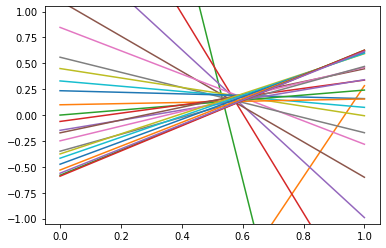

In [166]:
# plotting all the boundary lines that best classify (or at least what is perceived to be the best fit)
# graphing these lines over the data would be a clearer image, and i will do that in a later example
for line in lines:
    plt.plot(line)
plt.xlim(-0.05,1.05)
plt.ylim(-1.05,1.05)
plt.show()

Rather than using ON and OFF, i.e 1 or 0 (this OR/AND/NOT that) -- we can also seek probability of an input's label using sigmoid rather than the step function

In [13]:
# hey check it out, its a sigmoid!
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Multilayer Perception using Sigmoid Activation

In [19]:
# build net
n_input = 10 # 10 inputs 
n_hidden = 3 # 3 nodes (THE MULTI LAYER, aka the hidden layer)
n_output = 2 # 2 outputs that express probility between 0 or 1

# generate random numbers
np.random.seed(42)
X = np.random.randn(10)
# generate random weights
weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(n_input, n_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(n_hidden, n_output))
print('Inputs')
print(X)
print('\n')
print('Weights from Inputs to Hidden Layer:')
print(weights_input_to_hidden)
 ### Forward Pass through the network ###
hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)
# printing hidden layer output shows the output of each node in the hidden layer
print('\n')
print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, 
                        weights_hidden_to_output)
# using sigmod as final activation
output_layer_out = sigmoid(output_layer_in)
print('\n')
print('Output-layer Output (probabilities):')
print(output_layer_out)

Inputs
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


Weights from Inputs to Hidden Layer:
[[-0.04634177 -0.04657298  0.02419623]
 [-0.19132802 -0.17249178 -0.05622875]
 [-0.10128311  0.03142473 -0.09080241]
 [-0.14123037  0.14656488 -0.02257763]
 [ 0.00675282 -0.14247482 -0.05443827]
 [ 0.01109226 -0.11509936  0.0375698 ]
 [-0.06006387 -0.02916937 -0.06017066]
 [ 0.18522782 -0.00134972 -0.10577109]
 [ 0.08225449 -0.12208436  0.02088636]
 [-0.19596701 -0.1328186   0.01968612]]


Hidden-layer Output:
[0.40634768 0.56039247 0.43911021]


Output-layer Output (probabilities):
[0.48965227 0.48962169]


Reviewing the print statements, we can see the that we start with 10 inputs as a vector and a weight matrix that is 10x3, reduced to three nodes with vector by matrx multiplication, then passed forward and reduced further to two outputs. With sigmoid activation, we have the probability of the binary classifier

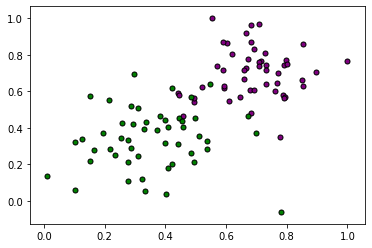

In [176]:
# using a different random set of numbers that i've labeled as 1 or 0 (this one is alittle more difficult and larger)
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [172]:
# functions needed to implement backprop using gradient descent

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# prediction formula using sigmoid
def output_prediction(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# error via log-loss (with this we can allow the model to learn)
def error_(y, output):
    return y*np.log(output) - (1-y) * np.log(1-output)

# gradient descent step (using the loss, with each step we update the weights and thus the model learns)
def update_weights(x, y, weights, bias, learnrate):
    output = output_prediction(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias


========== Epoch 0 ==========
Train loss:  0.001635885803963908
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  -0.1731078024236241
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  -0.14805218621137747   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  -0.12628815990964293   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  -0.10957125901546412   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  -0.096516812274257   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  -0.08612377653826854   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  -0.07770072757127924   WARNING - The Loss is INCREASING! ooh noo!
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  -0.07076380783073391   WARNING - T

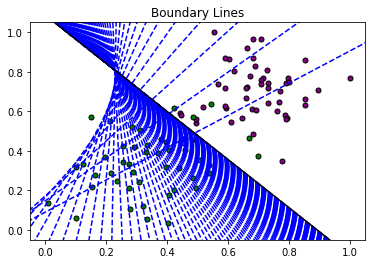

In [196]:
# local library that implents the above functions into the mulitlayer perceptron
import descent_perceptron_error as dpe
np.random.seed(44)

epochs = 100
learnrate = 0.01
dpe.train(X, y, 
      epochs, 
      learnrate, 
      True)

We can see that with sigmoid activation and gradient descent implemented with backpropagation, the multi layer perceptron is able to find the line best fit to a 94% accuracy.